In [ ]:
import cv2
import numpy as np
# 生成色相矩阵
m1 = np.arange(0,255,1)
m1 = m1.reshape(-1, 1)
m2 = np.multiply(m1, np.array([1,1,1]))
m3 = m2.flatten().reshape(1, -1)
m4 = np.ones([600, 1])
m5 = np.multiply(m4, m3).astype(np.uint8)
# 生成hsv矩阵
cv2.imshow("1", m5*10)
cv2.waitKey()

In [ ]:
# 函数插值拟合
import openpyxl
from openpyxl import Workbook
import os

def load_xlsx(filename='./date.xlsx'):
    datasheet = openpyxl.load_workbook(filename)
    print("加载%s成功" % filename)
    return datasheet
    
def read_sheet(datasheet, sheetnumber=0):   
    # 载入数据
    sheet = datasheet[datasheet.sheetnames[sheetnumber]]
    dic = {}
    count = 0
    for col in sheet.columns:
        # 循环处理每一行的数据
        count += 1
        if count > 3:
            break
        data = []
        for cell in col:
            if cell.value == None:
                cell.value = 0
            data.append(cell.value)
        # 更新到dic中
        dic.update({data[0]: data[1:]})
    print("载入数据中")
    return dic

datesheet = load_xlsx(r"D:\Desktop\EndNoteHere\researchHere\组会PPT\20221025-灰度&温度拟合.xlsx")
dictionary = read_sheet(datesheet, sheetnumber=5)

print(dictionary)

In [ ]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=dictionary['G1']
y=dictionary['T']

xnew=np.linspace(8,3660,3653)

pl.plot(x,y,'ro')
list1=['linear','nearest', 'zero', 'slinear']
list2=[0,1,2,3,4,5,6,7,8,9]
for kind in list1:
    print(kind)
    f=interpolate.interp1d(x,y,kind=kind, bounds_error = False, fill_value="extrapolate")
    #f是一个函数，用这个函数就可以找插值点的函数值了：
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=kind)

pl.legend(loc='lower right')
pl.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dx=0.01;dy=0.01
x=np.arange(-2.0,2.0,dx)
y=np.arange(-2.0,2.0,dy)
X,Y=np.meshgrid(x,y)
def f(x,y):
    return(1-y**5+x**5)*np.exp(-x**2-y**2)
C=plt.contour(X,Y,f(X,Y),8,colors='black')  #生成等值线图
plt.contourf(X,Y,f(X,Y),8)
plt.clabel(C,inline=1,fontsize=10)

np.random

In [ ]:
N = np.random.randint(1200,1800,size=(1000,1000))
dx=0.01;dy=0.01
x=np.arange(-0.0,7.65,dx)
y=np.arange(-3.0,3.0,dy)
X,Y=np.meshgrid(x,y)
print(m5)

C=plt.contour(X,Y,m5,8,colors='black')  #生成等值线图
plt.contourf(X,Y,m5,8)
plt.colorbar()
plt.clabel(C,inline=1,fontsize=10)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
while 1:
    plt.cla()
    plt.imshow(np.random.randint(0, 2, (2, 2)))
    plt.pause(0.1)


[[ True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True False False False  True  True  True]
 [ True  True  True False False False False False  True  True]
 [ True  True  True False False False False False  True  True]
 [ True  True  True False False False False False  True  True]
 [ True  True False False False False False False False  True]
 [ True  True False False False False False False False  True]
 [ True  True False False False False False False False  True]
 [ True False False False False False False False False False]
 [ True False False False False False False False False False]]


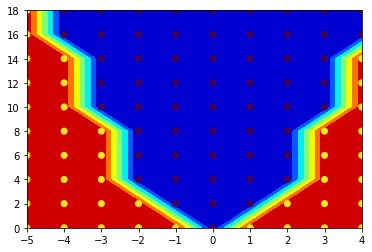

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(-5,5,1)
y = np.arange(0,20,2)
xx,yy = np.meshgrid(x,y)
 
z = np.square(xx) - yy >0
print(z)
plt.contourf(xx,yy,z,cmap="jet")
plt.scatter(xx,yy,c = z)
plt.show()

In [2]:
# 读取16位图像
from skimage import io
img16 = io.imread('./2022-12-07/16-20-25-originalsrc1.tif') #已经是16位图像
print(img16.dtype)

uint16


In [1]:
keyValue = 0
FirstGetSiftPara = True
Lambda1 = 808
Lambda2 = 700
import cv2
import numpy as np
import time
import math
from skimage import io


# 双光融合  ！！！！！！！！
def Pyrometricfunc(img1, img2, Lambda1, Lambda2):
    # img为12位图像
    # parameters setting
    T = 300  # temperature(K)
    C1 = 3.7419e-16  # first planck's constant(W*m^2)
    C2 = 1.4388e-2  # second planck's constant(m*K)

    m2nm = 1e9  # m to nm

    G1 = img1  # grey level
    G2 = img2
    # G2 = ThresholdProcess(G2, 0)
    G2[np.where(G2 <= 50)] = 1E4

    # 注意C2和lambda间的单位换算
    Uppart = C2 * (1 / Lambda2 - 1 / Lambda1) * m2nm
    # ------------------------------------------这里后面处理
    # 错误数据：（1）G2不能有极小值或0；（2）LnSnumber不能和LnGnumber符号相反；
    Gnumber = (G1) / (G2)
    # 对背景数据进行极小化处理
    Gnumber[np.where(Gnumber < 0.01)] = 1E-4
    Snumber = 3.9203 - 4.46269 * Gnumber
    Downpart = np.log(Gnumber) + math.log(math.pow(Lambda1 / Lambda2, 5), math.e) - np.log(Snumber)  # 这里为二维数据
    T = Uppart / Downpart

    Maxtemperature = T[np.where(G1 == np.max(G1))][0]
    # print(Maxtemperature)
    # 做个预处理
    T16 = T.astype(np.float16)
    T_uplimit = (int(1300 / 100) + 1) * 100  #额定温度上限
    # T16[np.where(T16 > (Maxtemperature + 1))] = np.min(T16)
    T16[np.where(T16 is np.nan)] = np.min(T16)
    T8 = T16 / T_uplimit * 255
    T8 = T8.astype(np.uint8)
    # ------------------------------------------这里后面处理
    return T16, T8, Maxtemperature

originalsrc1 = io.imread('./2022-12-08/13-33-19-originalsrc1.tif') #已经是16位图像
originalsrc2 = io.imread('./2022-12-08/13-33-19-originalsrc2.tif') #已经是16位图像

# 进行点的匹配
if FirstGetSiftPara | (keyValue == ord('f')):
    srcwhere1 = np.where(originalsrc1 == np.max(originalsrc1))
    srcwhere2 = np.where(originalsrc2 == np.max(originalsrc2))
    src1x = srcwhere1[0][0]
    src1y = srcwhere1[1][0]
    src2x = srcwhere2[0][0]
    src2y = srcwhere2[1][0]
    delteX = src1x - src2x
    delteY = src1y - src2y
    # 采用numpy roll实现偏移
    FirstGetSiftPara = False
    keyValue = 0
    print(delteX, delteY)

dx = -57
dy = -37
delteX = dx
delteY = dy
while(keyValue != ord('q')):
    if keyValue == ord('i'):
        delteX = 1
        dx += delteX
        print("now: ", dx, dy)
    if keyValue == ord('k'):
        delteX = -1
        dx += delteX
        print("now: ", dx, dy)
    if keyValue == ord('l'):
        delteY = 1
        dy += delteY
        print("now: ", dx, dy)
    if keyValue == ord('j'):
        delteY = -1
        dy += delteY
        print("now: ", dx, dy)
    originalsrc2 = np.roll(originalsrc2, (delteX, delteY), (0, 1))
    
    srcwhere1 = np.where(originalsrc1 == np.max(originalsrc1))
    srcwhere2 = np.where(originalsrc2 == np.max(originalsrc2))
    # print("src1maxpoint= " + str(srcwhere1) + "  src2maxpoint= " + str(srcwhere2))
    # 相机1&2双光测温
    # print("Lamda1 %d and Lamda2 %d" % (Lambda1, Lambda2))
    Tpic16, Tpic8, maxtemperature = Pyrometricfunc(originalsrc2,
                                                    originalsrc1, Lambda2,
                                                    Lambda1)

    # temperwhere = np.where(Tpic16 == maxtemperature)
    # if np.shape(temperwhere)[0] != 0:  # 去除报错因素
    #     temperx = temperwhere[0][0]
    #     tempery = temperwhere[1][0]

    # 图像配准，选用两幅原始图像进行灰度处理后配准
    # 故障排除:由于配准位置问题导致后面抠图超出边界，导致 error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
    if src1x < 50:
        src1x = 50
        src2x = 50
    if src1y < 50:
        src1y = 50
        src2y = 50
    delteX = 0
    delteY = 0
    cv2.imshow("1", Tpic8)
    keyValue = cv2.waitKey(1)

-705 -117


d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log


now:  -58 -37
now:  -59 -37
now:  -60 -37
now:  -61 -37
now:  -60 -37
now:  -59 -37
now:  -58 -37
now:  -57 -37
now:  -56 -37
now:  -55 -37
now:  -54 -37
now:  -53 -37
now:  -52 -37
now:  -51 -37
now:  -50 -37
now:  -49 -37
now:  -48 -37
now:  -47 -37
now:  -46 -37
now:  -45 -37
now:  -44 -37
now:  -43 -37
now:  -42 -37
now:  -41 -37
now:  -40 -37
now:  -39 -37
now:  -38 -37
now:  -37 -37
now:  -36 -37
now:  -35 -37
now:  -34 -37
now:  -33 -37
now:  -32 -37
now:  -31 -37
now:  -30 -37
now:  -29 -37
now:  -28 -37
now:  -27 -37
now:  -26 -37
now:  -25 -37
now:  -24 -37
now:  -23 -37
now:  -22 -37
now:  -21 -37
now:  -20 -37
now:  -19 -37
now:  -18 -37
now:  -17 -37
now:  -16 -37
now:  -15 -37
now:  -14 -37
now:  -13 -37
now:  -12 -37
now:  -11 -37
now:  -10 -37
now:  -9 -37
now:  -8 -37
now:  -7 -37
now:  -6 -37
now:  -5 -37
now:  -4 -37
now:  -3 -37
now:  -2 -37
now:  -3 -37
now:  -4 -37
now:  -4 -36
now:  -4 -35
now:  -4 -34
now:  -4 -33
now:  -4 -32
now:  -4 -31
now:  -4 -30
now:  -4 

In [17]:
from skimage import io
import cv2
originalsrc2 = io.imread('./2022-12-08-南智晶体炉测量/16-08-10-int8src2.tif') #已经是16位图像
originalsrc2=cv2.cvtColor(originalsrc2, cv2.COLOR_GRAY2BGR)
originalsrc2 = cv2.GaussianBlur(originalsrc2, (5,5), 0)
originalsrc2=cv2.applyColorMap(originalsrc2, cv2.COLORMAP_TWILIGHT_SHIFTED)
cv2.namedWindow("1", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)
cv2.imshow("1", originalsrc2)
cv2.waitKey()

-1

d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\ipykernel_launcher.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.


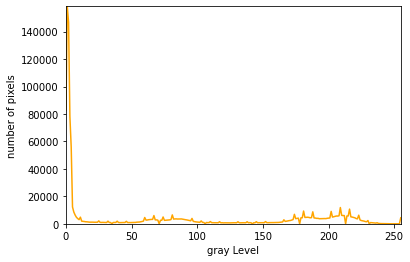

In [1]:
# 灰度直方图
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
#定义caleGrayHist函数来计算灰度直方图
def caleGrayHist(image):
    #灰度图像的高、宽
    rows, cols = image.shape
    #存储灰度直方图
    grayHist = np.zeros([256], np.uint64) #图像的灰度级范围是0~255      
    for r in range(rows):
        for c in range(cols):
            
            grayHist[image[r][c]] +=1
            
    return grayHist
 
if __name__ == "__main__":
    img = io.imread('./2022-12-08-南智晶体炉测量/16-08-10-int8src2.tif') #已经是16位图像
    cv2.namedWindow("1", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)
    cv2.imshow("1", img)

    #计算灰度直方图
    dst2 = np.zeros_like(img)
    grayHist = caleGrayHist(img)
    cv2.normalize(img, dst2, 20, 120, cv2.NORM_MINMAX, cv2.CV_8U) #公式

    cv2.namedWindow("2", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)
    cv2.imshow("2", dst2)

    # 直方图均衡化
    dst3 = cv2.equalizeHist(img)
    cv2.namedWindow("3", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)
    cv2.imshow("3", dst3)

    
    #画出直方图
    x_range = range(256)
    plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')
    #设置坐标轴的范围
    y_maxValue = np.max(grayHist)
    plt.axis([0, 255, 0, y_maxValue]) #画图范围
    plt.xlabel("gray Level")
    plt.ylabel("number of pixels")
    plt.show()
    cv2.waitKey()

In [4]:
import csv
import datetime
timeNow = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
if not os.path.exists('./20221125-HK/CameraGreyOutput2'): #判断所在目录下是否有该文件名的文件夹
    os.makedirs("./20221125-HK/CameraGreyOutput2")
with open('./20221125-HK/CameraGreyOutput2/Output_' + timeNow + '.csv','w',newline='')as csv_file:
    writer=csv.writer(csv_file)
    # writerow 写入一行数据
    writeDatum = ["Time", "CameraA Max"]
    writer.writerow(writeDatum)
    
    while True:
        writer = csv.writer(csv_file)
        writer.writerow(['id','name','age'])
        writer.writerow(['10001','ZhangSan',18])
        writer.writerow(['10002','LiSi','20'])

KeyboardInterrupt: 